In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:


results = pd.read_csv(
    "Discharge_ReferenceTest.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)

print(results.index)  # will show a DatetimeIndex
print(results.head())

DatetimeIndex(['1987-01-01 00:00:00+00:00', '1987-01-02 00:00:00+00:00',
               '1987-01-03 00:00:00+00:00', '1987-01-04 00:00:00+00:00',
               '1987-01-05 00:00:00+00:00', '1987-01-06 00:00:00+00:00',
               '1987-01-07 00:00:00+00:00', '1987-01-08 00:00:00+00:00',
               '1987-01-09 00:00:00+00:00', '1987-01-10 00:00:00+00:00',
               ...
               '1992-12-22 00:00:00+00:00', '1992-12-23 00:00:00+00:00',
               '1992-12-24 00:00:00+00:00', '1992-12-25 00:00:00+00:00',
               '1992-12-26 00:00:00+00:00', '1992-12-27 00:00:00+00:00',
               '1992-12-28 00:00:00+00:00', '1992-12-29 00:00:00+00:00',
               '1992-12-30 00:00:00+00:00', '1992-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=2192, freq=None)
                               Chatly        Kerki      Tyumen   Kazalinsk
time                                                                      
1987-01-01 00:00:00+

In [3]:
results_i = pd.read_csv(
    "Discharge_IrrigationTest.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)

print(results_i.index)  # will show a DatetimeIndex
print(results_i.head())

DatetimeIndex(['1987-01-01 00:00:00+00:00', '1987-01-02 00:00:00+00:00',
               '1987-01-03 00:00:00+00:00', '1987-01-04 00:00:00+00:00',
               '1987-01-05 00:00:00+00:00', '1987-01-06 00:00:00+00:00',
               '1987-01-07 00:00:00+00:00', '1987-01-08 00:00:00+00:00',
               '1987-01-09 00:00:00+00:00', '1987-01-10 00:00:00+00:00',
               ...
               '1992-12-22 00:00:00+00:00', '1992-12-23 00:00:00+00:00',
               '1992-12-24 00:00:00+00:00', '1992-12-25 00:00:00+00:00',
               '1992-12-26 00:00:00+00:00', '1992-12-27 00:00:00+00:00',
               '1992-12-28 00:00:00+00:00', '1992-12-29 00:00:00+00:00',
               '1992-12-30 00:00:00+00:00', '1992-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=2192, freq=None)
                               Chatly        Kerki      Tyumen   Kazalinsk
time                                                                      
1987-01-01 00:00:00+

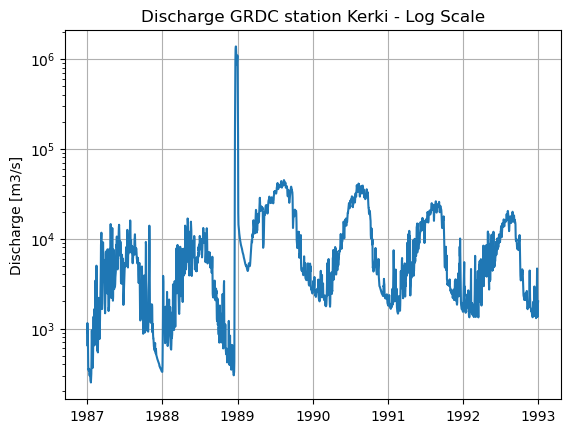

In [42]:
plt.plot(results['Kerki'])
#plt.ylim(0, 30000)
plt.yscale('log')
plt.title('Discharge GRDC station Kerki - Log Scale')
plt.ylabel('Discharge [m3/s]')
plt.grid()
plt.savefig('Discharge_Kerki_LogScale.png')


plt.show()


In [40]:
max_value = max(results.max())
print(max_value)

4099390.25


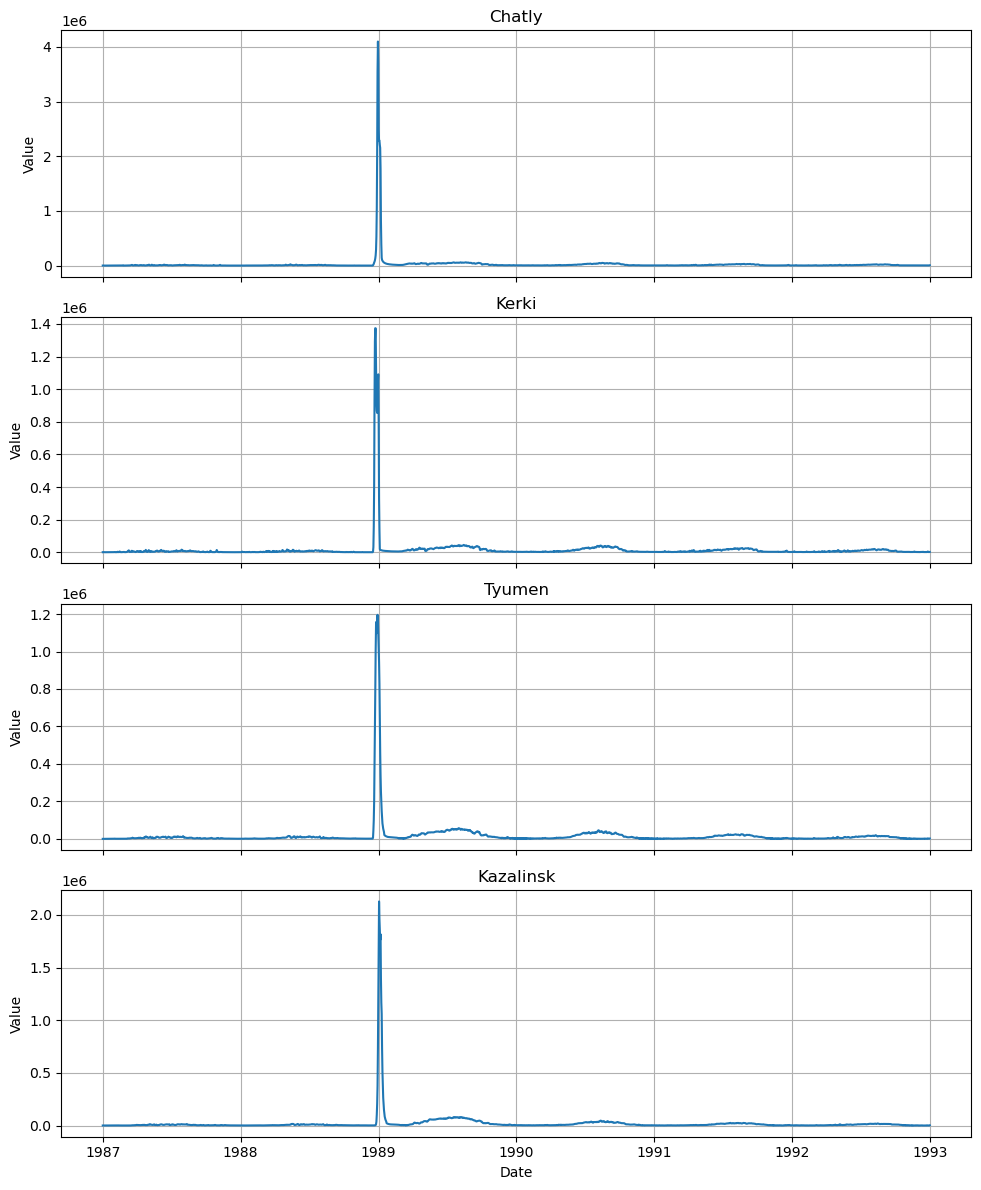

In [5]:
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)  
# 4 rows, 1 column of subplots

stations = results.columns[:4]  # first 4 columns

for i, station in enumerate(stations):
    axes[i].plot(results.index, results[station])
    axes[i].set_title(station)
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

axes[-1].set_xlabel('Date')  # label only bottom plot
plt.tight_layout()
plt.show()

## Forcing 88-95

In [6]:

file_tas='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/forcing_8795/AralSeaBasin/pcrglobwb/work/diagnostic/script/pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_1987-1995_AralSeaBasin.nc'
file_pr='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/forcing_8795/AralSeaBasin/pcrglobwb/work/diagnostic/script/pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_1987-1995_AralSeaBasin.nc'

<xarray.DataArray 'tas' (time: 3652)> Size: 15kB
[3652 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 29kB 1986-01-01 1986-01-02 ... 1995-12-31
    lat      float32 4B 40.0
    lon      float32 4B 70.0
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          K


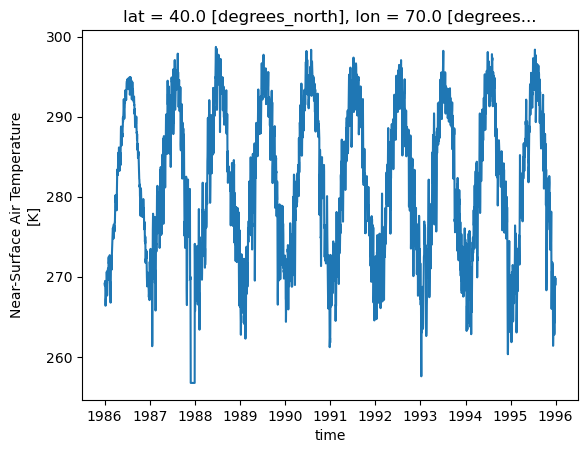

In [7]:
import xarray as xr

# open the file
ds = xr.open_dataset(file_tas);

# look at the structure
# pick the nearest grid point
ts = ds["tas"].sel(lat=40, lon=70, method="nearest")

# look at the time series
print(ts)

# plot it
ts.plot()

<xarray.DataArray 'pr' (time: 3652)> Size: 15kB
[3652 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 29kB 1986-01-01 1986-01-02 ... 1995-12-31
    lat      float32 4B 40.0
    lon      float32 4B 70.0
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          m


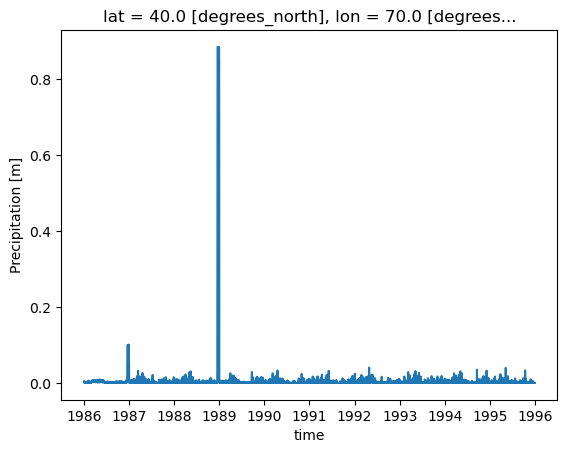

In [8]:
ds_pr = xr.open_dataset(file_pr);

# look at the structure
# pick the nearest grid point
ts_pr = ds_pr["pr"].sel(lat=40, lon=70, method="nearest")

# look at the time series
print(ts_pr)

# plot it
ts_pr.plot()

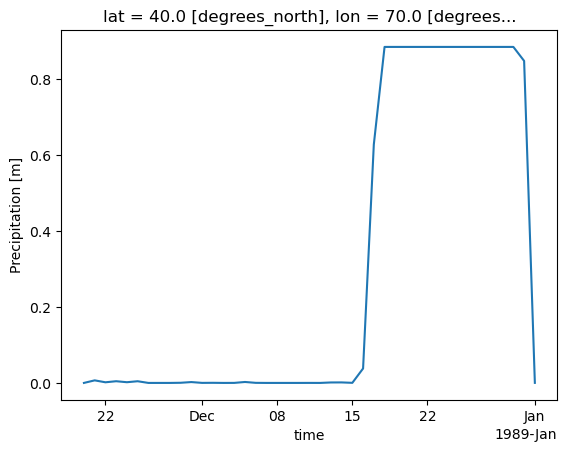

In [34]:
ts_pr_year = ts_pr.sel(time=slice('1988-11-20', '1989-01-01'))
ts_pr_year.plot()
plt.savefig('ERA5_pr_1988-89.png')
plt.show()

array([8.94880446e-04, 2.04842025e-03, 2.48650974e-03, 2.12654611e-03,
       5.57311624e-03, 6.07690541e-03, 2.78837816e-03, 1.02938199e-03,
       2.32174736e-03, 1.50212168e-03, 2.70190532e-03, 2.12640874e-03,
       2.21220311e-03, 1.04813254e-03, 2.35531316e-03, 2.77760997e-03,
       5.52313775e-03, 7.17216879e-02, 9.83085036e-02, 9.88353342e-02,
       9.98162553e-02, 9.89125222e-02, 9.87824202e-02, 9.95844156e-02,
       9.89246070e-02, 1.00240961e-01, 1.00279309e-01, 9.90271196e-02,
       1.00489654e-01, 9.96143073e-02, 9.99416783e-02, 1.17527116e-02,
       6.27410918e-05, 0.00000000e+00, 1.30217368e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.84110592e-05, 1.18379432e-06,
       0.00000000e+00, 0.00000000e+00, 8.36942578e-04, 9.47035460e-06,
       3.55138309e-06, 4.94826003e-04, 7.95509783e-04, 1.77569145e-05,
       2.61026621e-03, 8.18238594e-03, 1.64665794e-03, 4.38003844e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

## Forcing 88-88

In [11]:

file_tas_88='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/forcing_8888/AralSeaBasin/pcrglobwb/work/diagnostic/script/pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_1988-1988_AralSeaBasin.nc'
file_pr_88='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/forcing_8888/AralSeaBasin/pcrglobwb/work/diagnostic/script/pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_1988-1988_AralSeaBasin.nc'

<xarray.DataArray 'tas' (time: 731)> Size: 3kB
[731 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 6kB 1987-01-01 1987-01-02 ... 1988-12-31
    lat      float32 4B 40.0
    lon      float32 4B 70.0
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          K


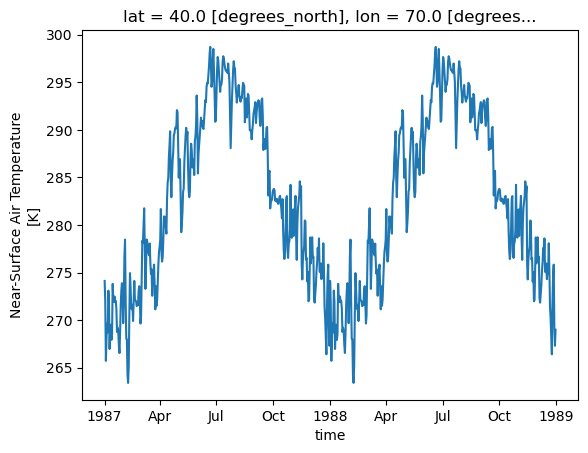

In [12]:

# open the file
ds_88 = xr.open_dataset(file_tas_88);

# look at the structure
# pick the nearest grid point
ts_88 = ds_88["tas"].sel(lat=40, lon=70, method="nearest")

# look at the time series
print(ts_88)

# plot it
ts_88.plot()

<xarray.DataArray 'pr' (time: 731)> Size: 3kB
[731 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 6kB 1987-01-01 1987-01-02 ... 1988-12-31
    lat      float32 4B 40.0
    lon      float32 4B 70.0
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          m


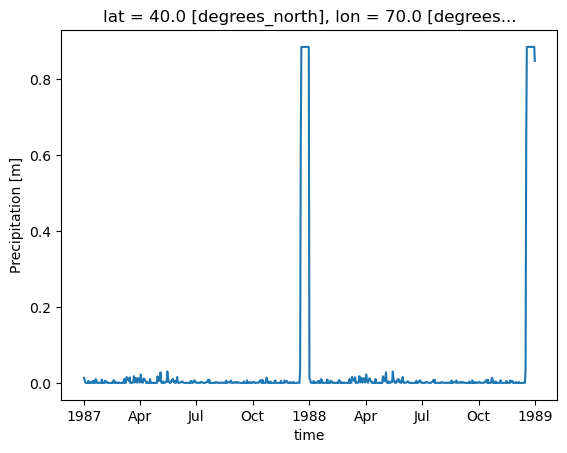

In [13]:

# open the file
ds_pr_88 = xr.open_dataset(file_pr_88);

# look at the structure
# pick the nearest grid point
ts_88_pr = ds_pr_88["pr"].sel(lat=40, lon=70, method="nearest")

# look at the time series
print(ts_88_pr)

# plot it
ts_88_pr.plot()

## forcing 88-89

In [16]:

file_tas_89='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/forcing_8889/AralSeaBasin/pcrglobwb/work/diagnostic/script/pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_1988-1989_AralSeaBasin.nc'
file_pr_89='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/forcing_8889/AralSeaBasin/pcrglobwb/work/diagnostic/script/pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_1988-1989_AralSeaBasin.nc'

<xarray.DataArray 'tas' (time: 1096)> Size: 4kB
[1096 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 9kB 1987-01-01 1987-01-02 ... 1989-12-31
    lat      float32 4B 40.0
    lon      float32 4B 70.0
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          K


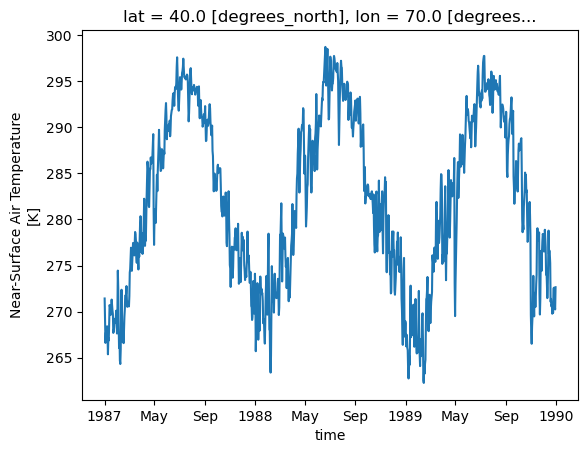

In [17]:

# open the file
ds_99 = xr.open_dataset(file_tas_89);


ts_89 = ds_99["tas"].sel(lat=40, lon=70, method="nearest")

# look at the time series
print(ts_89)

# plot it
ts_89.plot()

<xarray.DataArray 'pr' (time: 1096)> Size: 4kB
[1096 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 9kB 1987-01-01 1987-01-02 ... 1989-12-31
    lat      float32 4B 40.0
    lon      float32 4B 70.0
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          m


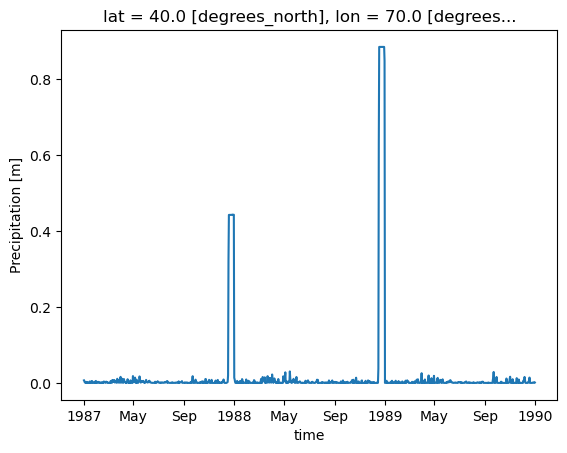

In [18]:


# open the file
ds_pr_89 = xr.open_dataset(file_pr_88);

# look at the structure
# pick the nearest grid point
ts_89_pr = ds_pr_89["pr"].sel(lat=40, lon=70, method="nearest")

# look at the time series
print(ts_89_pr)

# plot it
ts_89_pr.plot()

In [20]:
ts_pr.max().values

array(0.8842486, dtype=float32)

## forcing 9095

In [21]:

file_tas_90='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/forcing_9095/AralSeaBasin/pcrglobwb/work/diagnostic/script/pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_1990-1995_AralSeaBasin.nc'
file_pr_90='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/forcing_9095/AralSeaBasin/pcrglobwb/work/diagnostic/script/pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_1990-1995_AralSeaBasin.nc'

<xarray.DataArray 'tas' (time: 2556)> Size: 10kB
[2556 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 20kB 1989-01-01 1989-01-02 ... 1995-12-31
    lat      float32 4B 40.0
    lon      float32 4B 70.0
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          K


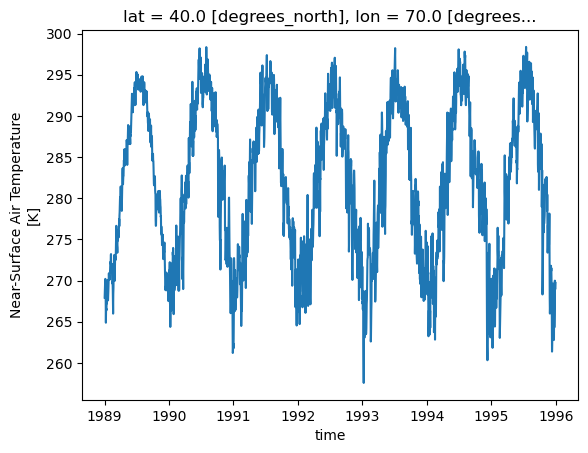

In [23]:

# open the file
ds_90 = xr.open_dataset(file_tas_90);


ts_90 = ds_90["tas"].sel(lat=40, lon=70, method="nearest")

# look at the time series
print(ts_90)

# plot it
ts_90.plot()

<xarray.DataArray 'pr' (time: 2556)> Size: 10kB
[2556 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 20kB 1989-01-01 1989-01-02 ... 1995-12-31
    lat      float32 4B 40.0
    lon      float32 4B 70.0
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          m


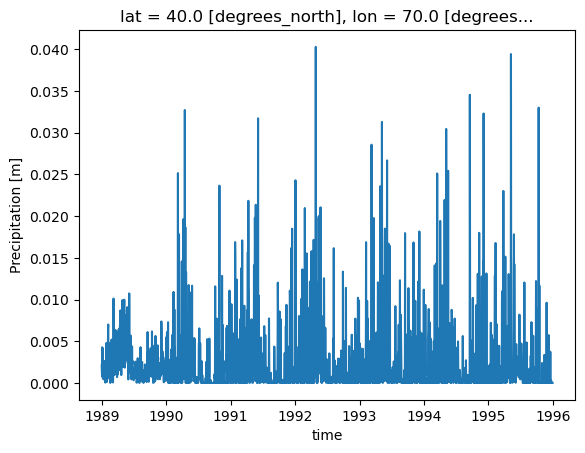

In [25]:
# open the file
ds_pr_90 = xr.open_dataset(file_pr_90);


ts_pr_90 = ds_pr_90["pr"].sel(lat=40, lon=70, method="nearest")

# look at the time series
print(ts_pr_90)

# plot it
ts_pr_90.plot()

## 8992

In [30]:

file_tas_90='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/forcing_8992/AralSeaBasin/pcrglobwb/work/diagnostic/script/pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_1989-1992_AralSeaBasin.nc'
file_pr_90='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/forcing_8992/AralSeaBasin/pcrglobwb/work/diagnostic/script/pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_1989-1992_AralSeaBasin.nc'

<xarray.DataArray 'tas' (time: 1826)> Size: 7kB
[1826 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 15kB 1988-01-02 1988-01-03 ... 1992-12-31
    lat      float32 4B 40.0
    lon      float32 4B 70.0
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          K


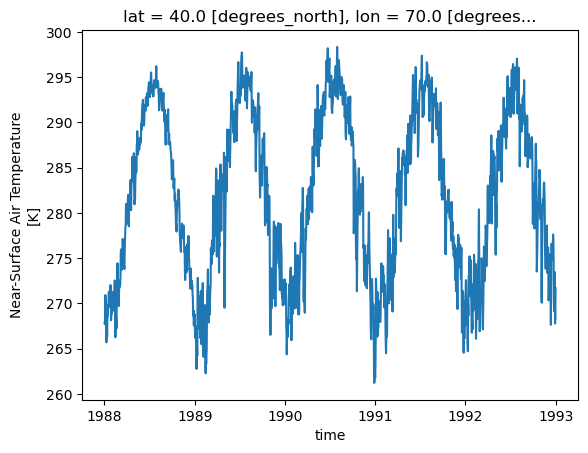

In [31]:

# open the file
ds_90 = xr.open_dataset(file_tas_90);


ts_90 = ds_90["tas"].sel(lat=40, lon=70, method="nearest")

# look at the time series
print(ts_90)

# plot it
ts_90.plot()

<xarray.DataArray 'pr' (time: 1826)> Size: 7kB
[1826 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 15kB 1988-01-02 1988-01-03 ... 1992-12-31
    lat      float32 4B 40.0
    lon      float32 4B 70.0
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          m


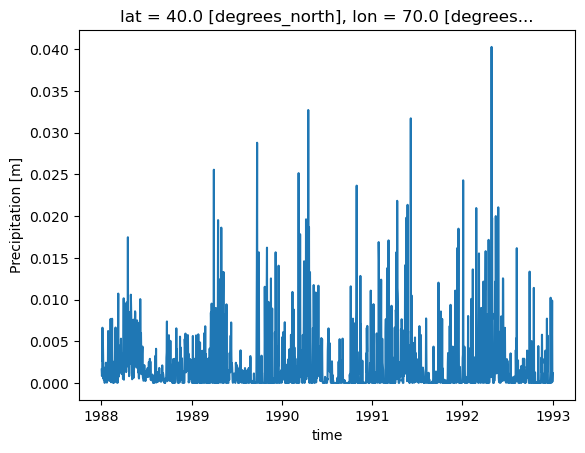

In [32]:
# open the file
ds_pr_90 = xr.open_dataset(file_pr_90);


ts_pr_90 = ds_pr_90["pr"].sel(lat=40, lon=70, method="nearest")

# look at the time series
print(ts_pr_90)

# plot it
ts_pr_90.plot()